Theofilus Arkhi Susanto
(theofilus.arkhi@mail.ugm.ac.id)
25/555265/PPA/07030

In [1]:
%pip install numpy opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np, cv2, matplotlib.pyplot as plt

In [3]:
image = cv2.imread("image-assignment-1/img_83.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

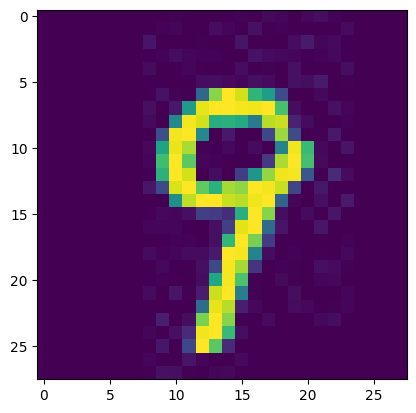

In [4]:
plt.imshow(image)

Downsampling

In [5]:
# Downsampling

pool_size = 2

def max_element(matrix, start_y, start_x, pool_size):
  cur_max = -999999999999
  for i in range(start_y, start_y+pool_size):
    for j in range(start_x, start_x+pool_size):
      cur_max = max(cur_max, matrix[i][j])
  return cur_max

def mean_element(matrix, start_y, start_x, pool_size):
  cur_mean = 0
  divisor = 0
  for i in range(start_y, start_y+pool_size):
    for j in range(start_x, start_x+pool_size):
      cur_mean += matrix[i][j]
      cur_mean/=2
  return cur_mean

def median_element(matrix, start_y, start_x, pool_size):
  new_list = []
  for i in range(start_y, start_y+pool_size):
    for j in range(start_x, start_x+pool_size):
      new_list.append(matrix[i][j])
  new_list = sorted(new_list)
  return new_list[(len(new_list)-1)//2]

def max_downsampling(matrix):
  new_height = len(matrix) - 1
  new_width = len(matrix[0]) - 1
  new_list = np.zeros((new_height, new_width), dtype=int)
  for i in range(0, len(matrix)):
    for j in range(0, len(matrix)):
      try:
        new_val = max_element(matrix, i, j, pool_size)
        new_list[i][j]=(new_val)
      except:
        pass

  return new_list

def mean_downsampling(matrix):
  new_height = len(matrix) - 1
  new_width = len(matrix[0]) - 1
  new_list = np.zeros((new_height, new_width), dtype=int)
  for i in range(0, len(matrix)):
    for j in range(0, len(matrix)):
      try:
        new_val = mean_element(matrix, i, j, pool_size)
        new_list[i][j]=(new_val)
      except:
        pass

  return new_list

def median_downsampling(matrix):
  new_height = len(matrix) - 1
  new_width = len(matrix[0]) - 1
  new_list = np.zeros((new_height, new_width), dtype=int)
  for i in range(0, len(matrix)):
    for j in range(0, len(matrix)):
      try:
        new_val = median_element(matrix, i, j, pool_size)
        new_list[i][j]=(new_val)
      except:
        pass

  return new_list

In [6]:
image.shape

(28, 28)

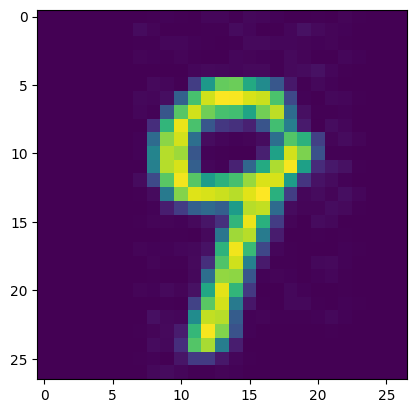

In [7]:
plt.imshow(mean_downsampling(image))

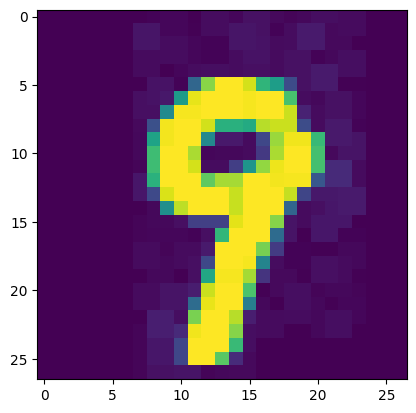

In [8]:
plt.imshow(max_downsampling(image))

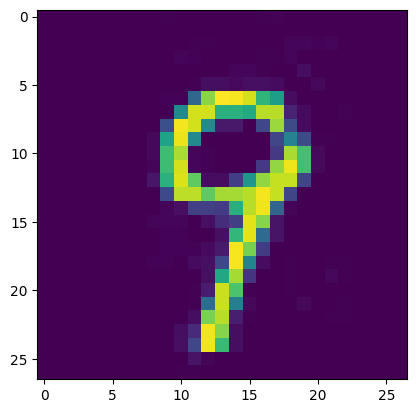

In [9]:
plt.imshow(median_downsampling(image))

In [10]:
median_downsampling(image)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,
          0,   0,   0,   0,   0,   4,   4,   2,   3,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   2,   0,
          0,   0,   0,   1,   1,   4,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   4,   4,   1,   0,   0,   9,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   9,
          9,   6,  10,  10,   7,   0,   0,   5,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   

Upsampling

In [11]:
# The upsampling process is done to the right and down of the current pixel

# [1, 2, 3]
# [4, 5, 6]
# [7, 8, 9]

# Becomes

# [1, N, 2, N, 3, N]
# [N, N, N, N, N, N]
# [4, N, 5, N, 6, N]
# [N, N, N, N, N, N]
# [7, N, 8, N, 9, N]
# [N, N, N, N, N, N]

# Where N is the new pixels location

Nearest neighbor

In [12]:
from collections import deque
class nearest_neighbor:

  def __init__ (self,  matrix):
    self.visited = [[False]*len(matrix[0]) for i in range(len(matrix))]
    self.lines = [[] for i in range(len(matrix)*len(matrix[0]))]
    self.matrix = matrix
    self.upsample_matrix = self.generate_upsample_matrix()

  def min_bfs(self, matrix, y, x, dist = 0):
    q=deque()
    q.append((y,x,dist))
    while len(q)!=0:
      y, x, dist= q.popleft()
      if(y>=len(matrix) or x >=len(matrix[0])):
        continue
      if(y<0 or x<0):
        continue

      if matrix[y][x] != -1:
        self.lines[dist].append(matrix[y][x])

      delta_y = [0, 1, 0, -1]
      delta_x = [1, 0, -1, 0]

      for i, _ in enumerate(delta_y):
        new_y = y+delta_y[i]
        new_x = x+delta_x[i]
        if self.visited[new_y][new_x] == False:
          self.visited[new_y][new_x]=True
          q.append((new_y,new_x,dist+1))

  def nearest_neighbor_min(self):
    new_matrix=np.copy(self.upsample_matrix)
    for i, item_i in enumerate(new_matrix):
      for j, item_j in enumerate(item_i):
        if item_j == -1:
          minimum_val = 999999999999
          self.visited = [[False]*100 for i in range(100)]
          self.lines = [[] for i in range(len(new_matrix)*len(new_matrix[0]))]
          self.min_bfs(self.upsample_matrix, i, j)
          for ii in self.lines:
            for jj in ii:
              minimum_val = min(minimum_val, jj)
            if(len(ii)>0):
              break
          new_matrix[i][j]=float(minimum_val)
          # print(i,j, minimum_val)
    return new_matrix

  def generate_upsample_matrix(self):
    new_matrix_height = len(self.matrix)*2
    new_matrix_width = len(self.matrix[0])*2

    new_matrix = [[-1]*new_matrix_width for i in range(new_matrix_height)]
    # new_matrix = np.ndarray((new_matrix_height,new_matrix_width), dtype='object')
    idx_i_new=0
    for i in range(len(self.matrix)):
      idx_j_new=0
      for j, item_j in enumerate(self.matrix[i]):
        new_matrix[idx_i_new][idx_j_new]=float(item_j)
        idx_j_new+=2
      idx_i_new+=2

    return new_matrix



In [13]:
graph = nearest_neighbor(image)

In [14]:
nearest_neighbor_img = graph.nearest_neighbor_min()

In [15]:
nearest_neighbor_img.shape

(56, 56)

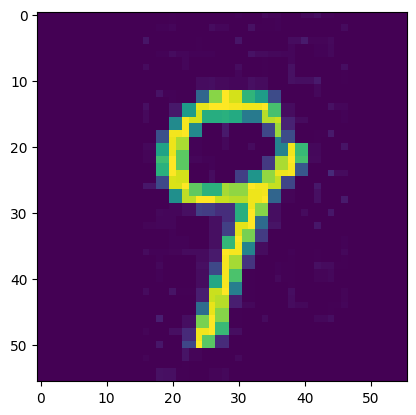

In [16]:
plt.imshow(nearest_neighbor_img)

Bilinear

In [17]:
from collections import deque
class bilinear:

  def __init__ (self,  matrix):
    self.visited = [[False]*len(matrix[0]) for i in range(len(matrix))]
    self.lines = [[] for i in range(len(matrix)*len(matrix[0]))]
    self.matrix = matrix
    self.upsample_matrix = self.generate_upsample_matrix()

  def bilinear_bfs(self, matrix, y, x, dist = 0):
    q=deque()
    q.append((y,x,dist))
    while len(q)!=0:
      y, x, dist= q.popleft()
      if(y>=len(matrix) or x >=len(matrix[0])):
        continue
      if(y<0 or x<0):
        continue

      if matrix[y][x] != -1:
        self.lines[dist].append(matrix[y][x])

      delta_y = [0, 1, 0, -1]
      delta_x = [1, 0, -1, 0]

      for i, _ in enumerate(delta_y):
        new_y = y+delta_y[i]
        new_x = x+delta_x[i]
        if self.visited[new_y][new_x] == False:
          self.visited[new_y][new_x]=True
          q.append((new_y,new_x,dist+1))

  def nearest_neighbor_bilinear(self):
    new_matrix=np.copy(self.upsample_matrix)
    for i, item_i in enumerate(new_matrix):
      for j, item_j in enumerate(item_i):
        if item_j == -1:
          sum = 0
          self.visited = [[False]*100 for i in range(100)]
          self.lines = [[] for i in range(len(new_matrix)*len(new_matrix[0]))]
          self.bilinear_bfs(self.upsample_matrix, i, j)
          for ii in self.lines:
            for jj in ii:
              sum += jj
              sum/=2
            if(len(ii)>0):
              break
          new_matrix[i][j]=sum
    return new_matrix

  def generate_upsample_matrix(self):
    new_matrix_height = len(self.matrix)*2
    new_matrix_width = len(self.matrix[0])*2

    new_matrix = [[-1]*new_matrix_width for i in range(new_matrix_height)]

    idx_i_new=0
    for i in range(len(self.matrix)):
      idx_j_new=0
      for j, item_j in enumerate(self.matrix[i]):
        new_matrix[idx_i_new][idx_j_new]=(item_j)
        idx_j_new+=2
      idx_i_new+=2

    return new_matrix



In [18]:
bl = bilinear(image)

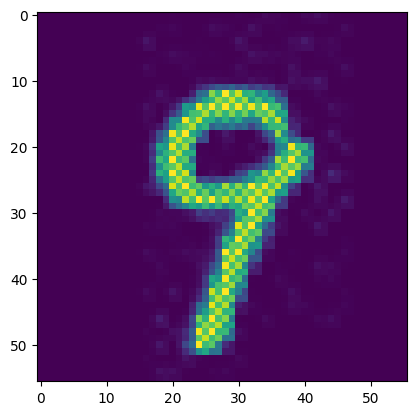

In [19]:
plt.imshow(bl.nearest_neighbor_bilinear())

Bicubic

In [23]:
from collections import deque
class Bicubic:

  def __init__ (self,  matrix):
    self.visited = [[False]*len(matrix[0]) for i in range(len(matrix))]
    self.lines = [[] for i in range(len(matrix)*len(matrix[0]))]
    self.matrix = matrix
    self.upsample_matrix = self.generate_upsample_matrix()

  def bicubic_bfs(self, matrix, y, x, dist = 0):
    q=deque()
    q.append((y,x,dist))
    while len(q)!=0:
      y, x, dist= q.popleft()
      if(y>=len(matrix) or x >=len(matrix[0])):
        continue
      if(y<0 or x<0):
        continue

      if matrix[y][x] != -1:
        self.lines[dist].append(matrix[y][x])

      delta_y = [0, 1, 0, -1]
      delta_x = [1, 0, -1, 0]

      for i, _ in enumerate(delta_y):
        new_y = y+delta_y[i]
        new_x = x+delta_x[i]
        if self.visited[new_y][new_x] == False:
          self.visited[new_y][new_x]=True
          q.append((new_y,new_x,dist+1))

  def nearest_neighbor_bicubic(self):
    new_matrix=np.copy(self.upsample_matrix)
    for i, item_i in enumerate(new_matrix):
      for j, item_j in enumerate(item_i):
        if item_j == -1:
          sum = 0
          self.visited = [[False]*100 for i in range(100)]
          self.lines = [[] for i in range(len(new_matrix)*len(new_matrix[0]))]
          self.bicubic_bfs(self.upsample_matrix, i, j)
          counter=0
          for ii in self.lines:
            for jj in ii:
              sum += jj
              sum/=2
            if(len(ii)>0):
              counter+=1
            if counter==2:
              break
          new_matrix[i][j]=sum
    return new_matrix

  def generate_upsample_matrix(self):
    new_matrix_height = len(self.matrix)*2
    new_matrix_width = len(self.matrix[0])*2

    new_matrix = [[-1]*new_matrix_width for i in range(new_matrix_height)]

    idx_i_new=0
    for i in range(len(self.matrix)):
      idx_j_new=0
      for j, item_j in enumerate(self.matrix[i]):
        new_matrix[idx_i_new][idx_j_new]=(item_j)
        idx_j_new+=2
      idx_i_new+=2

    return new_matrix



In [24]:
bc = Bicubic(image)

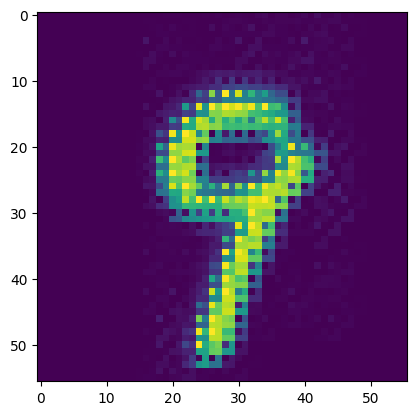

In [25]:
plt.imshow(bc.nearest_neighbor_bicubic())